# Ch2 - Arithmetic Circuit

In [1]:
print(bin(3))
print(bin(9))

0b11
0b1001


## Practice Problems

1. Create an arithmetic circuit that takes signals x₁, x₂, ..., xₙ and is satisfied if at least one signal is 0.

   `x1 * x2 * x3 * x4 ... * xn === 0`

2. Create an arithmetic circuit that takes signals x₁, x₂, ..., xₙ and is satsified if all are 1.

   `(x1 - 1) * (x2 - 1) * (x3 - 1)... * (xn - 1) === 0`

3. Assume on Australia, there is a 2-coloring scheme

   Recall that Australia has six territories:

   ![Australia map](https://static.wixstatic.com/media/706568_b649d43396ef43cd954f4beb61dc1bc6~mv2.jpg/v1/fill/w_315,h_284,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/706568_b649d43396ef43cd954f4beb61dc1bc6~mv2.jpg)

   **WA** = West Australia  
   **SA** = South Australia  
   **NT** = Northern Territory  
   **Q** = Queensland  
   **NSW** = New South Wales  
   **V** = Victoria  

   Let 0 be one color, and 1 be another color.

   ```
   # Color constraints
   WA * (WA - 1) === 0
   SA * (SA - 1) === 0
   NT * (Q - 1) === 0
   ...

   # Neighborhood constraints
   WA * NT === 0
   WA * SA === 0
   NT * SA === 0
   NT * Q === 0
   SA * NSW === 0
   SA * V === 0
   Q * NSW === 0
   NSW * V === 0
   ```

4. Devise an arithmetic circuit that constrains k to be the maximum of x, y, or z. That is, k should be equal to x if x is the maximum value, and same for y and z.

   ```
   # OR the following conditions tgt
   # (k - x) === 0 if x is max(x, y, z)
   # (k - y) === 0 if y is max(x, y, z)
   # (k - z) === 0 if z is max(x, y, z)
   
   # x is max(x, y, z) === x - y >= 0 && y - z >= 0
   ```

# Ch3 - Finite Fields & Modular Arithmetic

In [1]:
p = 11
q = pow(3, -1, p); print(q)

4


In [ ]:
import galois
import numpy as np
GF7 = galois.GF(7)

one_half = GF7(1) / GF7(2); print(one_half)
negative_two = -GF7(2); print(negative_two)

GF11 = galois.GF(11)
sqrt = np.sqrt(GF11(5)); print(sqrt)

p = 21888242871839275222246405745257275088548364400416034343698204186575808495617
GF = galois.GF(p)

poly = galois.Poly([1, 2, -8], GF)
roots = poly.roots(); print(f"roots: {roots}")

# Ch7 - Elliptic Curve Point Addition

Also check the wiki:  
<https://en.wikipedia.org/wiki/Elliptic_curve_point_multiplication>

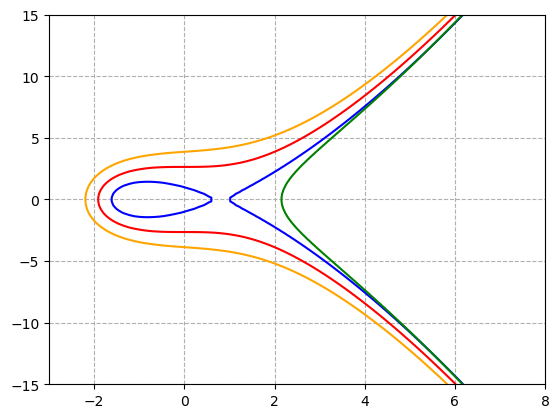

In [94]:
## Plotting elliptic curve

import numpy as np
import matplotlib.pyplot as plt

a1 = 0; b1 = 7
a2 = -2; b2 = 1
a3 = 0; b3 = -10
a4 = 2; b4 = 15

[y, x] = np.ogrid[-15:15:100j, -3:8:100j]
# The formula: y^2 = x^3 + a * x + b
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a1 - b1, [0], colors="red")
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a2 - b2, [0], colors="blue")
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a3 - b3, [0], colors="green")
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a4 - b4, [0], colors="orange")

plt.grid(which="both", axis="both", linestyle="--")
plt.show()

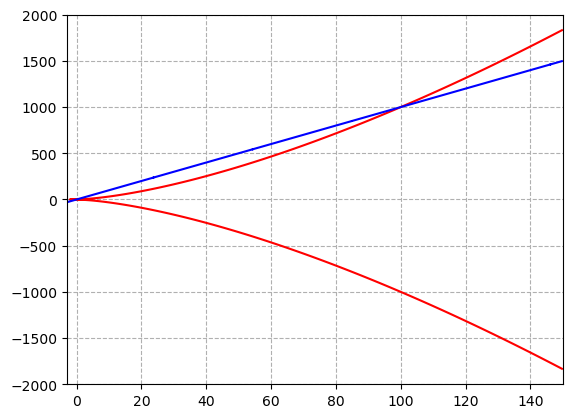

In [75]:
'''
Plotting elliptic curve
y^2 = x^3 + 10
y = 10x
'''

import numpy as np
import matplotlib.pyplot as plt

a1 = 0; b1 = 10

# Flipping between the following axis to see that at first it seems y=10x grow very fast, but 
# eventually the elliptic curve will catch up on its growth. Because elliptic curve is O(x^1.5).

# [y, x] = np.ogrid[-15:15:100j, -3:8:100j]
[y, x] = np.ogrid[-2000:2000:2000j, -3:150:2000j]
# The formula: y^2 = x^3 + a * x + b
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a1 - b1, [0], colors="red")
plt.contour(x.ravel(), y.ravel(), y - 10 * x, [0], colors="blue")

plt.grid(which="both", axis="both", linestyle="--")
plt.show()

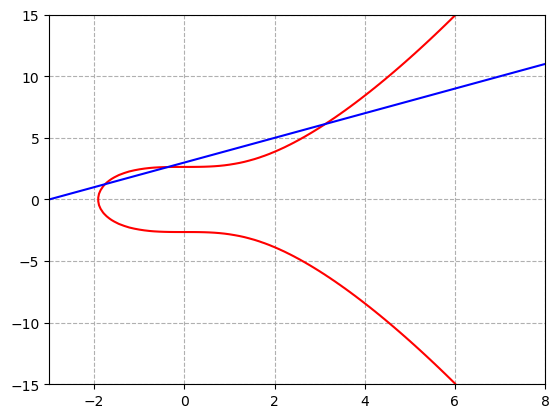

In [76]:
'''
Plotting elliptic curve
y^2 = x^3 + 7
y = x + 3
'''

import numpy as np
import matplotlib.pyplot as plt

a1 = 0; b1 = 7

# Flipping between the following axis to see that at first it seems y=10x grow very fast, but 
# eventually the elliptic curve will catch up on its growth. Because elliptic curve is O(x^1.5).

[y, x] = np.ogrid[-15:15:100j, -3:8:100j]
# [y, x] = np.ogrid[-2000:2000:2000j, -3:150:2000j]
# The formula: y^2 = x^3 + a * x + b
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a1 - b1, [0], colors="red")
plt.contour(x.ravel(), y.ravel(), y - x - 3, [0], colors="blue")

plt.grid(which="both", axis="both", linestyle="--")
plt.show()

# Ch8 - Elliptic Curves over Finite Field

Assume the equation

$y^2 = x^3 + 3\ (mod\ p)$

In [4]:
# Ethereum precompile
field_modulus = 21888242871839275222246405745257275088696311157297823662689037894645226208583

from libnum import has_sqrtmod_prime_power, sqrtmod_prime_power

p = 11
print(has_sqrtmod_prime_power(8, p, 1))

print(has_sqrtmod_prime_power(5, p, 1))

print(list(sqrtmod_prime_power(5, p, 1)))

False
True
[4, 7]


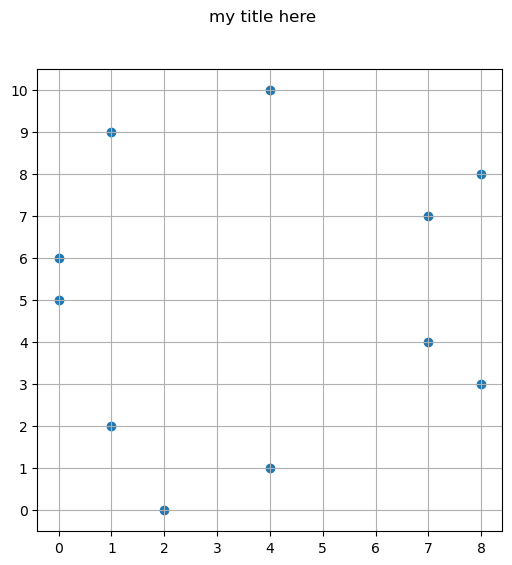

In [4]:
# Plot of an elliptic curve
from libnum import has_sqrtmod_prime_power, sqrtmod_prime_power
import matplotlib.pyplot as plt

def generate_points(mod):
    xs = []
    ys = []

    def y_squared(x):
        return (x**3 + 3) % mod

    for x in range(0, mod):
        if has_sqrtmod_prime_power(y_squared(x), mod, 1):
            square_roots = sqrtmod_prime_power(y_squared(x), mod, 1)
            for root in square_roots:
                ys.append(root)
                xs.append(x)
    return xs, ys

[xs, ys] = generate_points(11)
[fig, axes] = plt.subplots(1, 1)
fig.suptitle("my title here")
fig.set_size_inches(6, 6)
axes.set_xticks(range(0, 11))
axes.set_yticks(range(0, 11))
plt.grid()
plt.scatter(xs, ys)

In [9]:
from py_ecc.bn128 import G1, multiply, add, eq, neg

print(G1)
print(add(G1, G1))
print(multiply(G1, 2))
assert eq(add(multiply(G1, 10), multiply(G, 11)), multiply(G1, 21))

(1, 2)
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)


(1, 2)
(1, 21888242871839275222246405745257275088696311157297823662689037894645226208581)


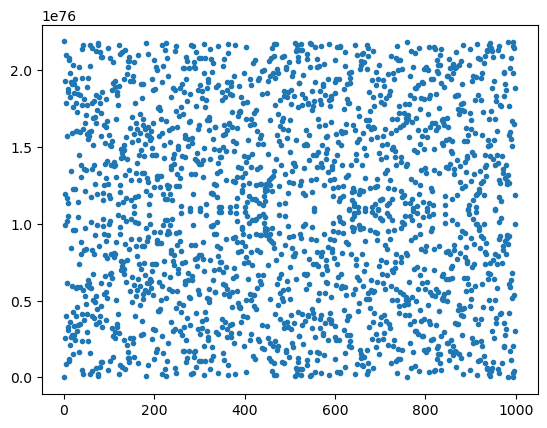

In [15]:
import matplotlib.pyplot as plt
from py_ecc.bn128 import G1, multiply, neg
import math
import numpy as np
xs = []
ys = []
for i in range(1, 1000):
    xs.append(i)
    ys.append(int(multiply(G1, i)[1]))
    xs.append(i)
    ys.append(int(neg(multiply(G1, i))[1]))
plt.scatter(xs, ys, marker=".")

print(multiply(G1, 1))
print(neg((multiply(G1, 1))))

In [22]:
from py_ecc.bn128 import curve_order, field_modulus, G1, multiply, eq
print(f"curve order: {curve_order}")
print(f"field modulus: {field_modulus}")
print(f"G1: {G1}")

x = 5
res1 = multiply(G1, x)
print(f"res1: {res1}")
assert eq(multiply(G1, x), multiply(G1, x + curve_order))

x = 2 ** 300 + 21; print(f"x: {x}")
y = 3 ** 50 + 11; print(f"y: {y}")

curve order: 21888242871839275222246405745257275088548364400416034343698204186575808495617
field modulus: 21888242871839275222246405745257275088696311157297823662689037894645226208583
G1: (1, 2)
res1: (10744596414106452074759370245733544594153395043370666422502510773307029471145, 848677436511517736191562425154572367705380862894644942948681172815252343932)
x: 2037035976334486086268445688409378161051468393665936250636140449354381299763336706183397397
y: 717897987691852588770260


In [29]:
from py_ecc.bn128 import G1, multiply, neg, is_inf, Z1, field_modulus

x = 12345678
p = multiply(G1, x); print(p)
p_inv = neg(p); print(p_inv) # finding the inverse of the elliptic curve point
is_inf(add(p, p_inv)) # this is to check whether it is an identity element

sum1 = int(p[1]) + int(p_inv[1])
print(sum1)
assert sum1 == field_modulus

(12013370014473995044348084069403521871346161104279710923681478013794595344915, 3784027075439183045336968409306138349365120150275149230524425089928030267082)
(12013370014473995044348084069403521871346161104279710923681478013794595344915, 18104215796400092176909437335951136739331191007022674432164612804717195941501)
21888242871839275222246405745257275088696311157297823662689037894645226208583
